In [1]:
# Author: Muneer Ahmad

In [7]:
# importing NetApp DataOps toolkit
from netapp_dataops.traditional import pull_object_from_s3
# loading Submodel (json format)
import json
# loading pandas for data analysis
import pandas as pd
# data plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def data_bucket_name_and_file(submodel_json):
    return submodel_json['submodelElements']['bucket-name']['value'], submodel_json['submodelElements']['bridge-data']['value']
    

In [9]:
# AAS submodel bucket name
s3_bucket='submodel-bucket4'

# key or identifier of the submodel
# s3_object_key = 'TestBridge'
s3_object_key = 'Bridge_123004'

# location to store the submodel after retrievin it
submodel_file='C:/Users/Ahmadm/AAS/pulled-object/Bridge_123004'

# location to store the data after retrieving it (mounting volume, backed by ONTAP)
bridge_data_path = 'Z:/data/'

In [10]:
## pulling submodel data from SG
pull_object_from_s3(
    s3_bucket = s3_bucket,              # S3 bucket to pull from. (required).
    s3_object_key = s3_object_key,          # Key of S3 object to pull (required).
    local_file = submodel_file,      # Local filepath (including filename) to save object to (if not specified, value of s3_object_key argument will be used).
    print_output = True   # Denotes whether or not to print messages to the console during execution.
)

Download complete.


In [11]:
# Opening JSON file
submodel_json = open(submodel_file)

# returns JSON object as a dictionary
submodel_full_data = json.load(submodel_json)

In [12]:
submodel_full_data

{'idShort': 'Bridge_123004',
 'identification': {'idType': 'Custom', 'id': 'Bridge_123004'},
 'dataSpecification': [],
 'embeddedDataSpecifications': [],
 'modelType': {'name': 'Submodel'},
 'kind': 'Instance',
 'submodelElements': {'bucket-name': {'modelType': {'name': 'Property'},
   'kind': 'Instance',
   'idShort': 'bucket-name',
   'value': 'bridge-data',
   'valueType': 'string',
   'parent': {'keys': [{'type': 'Submodel',
      'local': True,
      'value': 'Bridge_123004',
      'idType': 'Custom'}]}},
  'bridge-data': {'modelType': {'name': 'Property'},
   'kind': 'Instance',
   'idShort': 'bridge-data',
   'value': 'bridge_123004.csv',
   'valueType': 'string',
   'parent': {'keys': [{'type': 'Submodel',
      'local': True,
      'value': 'Bridge_123004',
      'idType': 'Custom'}]}}},
 'parent': {'keys': [{'type': 'AssetAdministrationShell',
    'local': True,
    'value': 'carrierBridge',
    'idType': 'Custom'}]}}

In [13]:
# get the bridge data bucket name and csv file name
bridge_bucket_name, bridge_data_csv = data_bucket_name_and_file(submodel_full_data)

In [14]:
# asset submodel bucket name
bridge_bucket_name

'bridge-data'

In [15]:
# asset submodel data
bridge_data_csv

'bridge_123004.csv'

In [16]:
## pulling bridge data from SG
pull_object_from_s3(
    s3_bucket = bridge_bucket_name,              # S3 bucket to pull from. (required).
    s3_object_key = bridge_data_csv,          # Key of S3 object to pull (required).
    local_file = bridge_data_path+bridge_data_csv,      # Local filepath (including filename) to save object to (if not specified, value of s3_object_key argument will be used).
    print_output = True   # Denotes whether or not to print messages to the console during execution.
)

Download complete.


In [17]:
# loading the bridge data as pandas dataFrame
bridge_data_df = pd.read_csv(bridge_data_path+bridge_data_csv, encoding= 'unicode_escape',  nrows=1000)

In [18]:
# displaying first few data entries/rows
bridge_data_df.head()

,Unnamed: 0,Time (s),Temperatur 1 in Grad (Â°),Temperatur 2 in Grad (Â°),Temperatur 3 in Grad (Â°),DMS 1 berechnet (-),DMS 2 berechnet (-),DMS 3 berechnet (-),DMS 4 berechnet (-),DMS 5 berechnet (-),...,Leer (V),Temperatur 3 (V),Beschleunigung 1 X (g),Beschleunigung 1 Y (g),Beschleunigung 1 Z (g),Temperatur 1 (V),Beschleunigung 2 X (g),Beschleunigung 2 Y (g),Beschleunigung 2 Z (g),Temperatur 2 (V)
0,0,0.001494,-0.012718,10.500972,0,-0.011722,0.070044,1.315529,0.599878,0.413372,...,12.401428,2.664535e-14,0.122896,0.155129,-0.865227,-0.012718,2.126127,2.001040,1.934456,10.500972
1,1,0.003494,0.015996,10.602121,0,0.053320,0.137069,1.346476,0.638282,0.479814,...,12.391083,2.664535e-14,0.126207,0.132039,-0.876202,0.015996,2.125903,2.001048,1.932476,10.602122
2,2,0.005495,0.014597,10.554775,0,-0.003667,0.080033,1.320995,0.603987,0.424448,...,12.432129,2.664535e-14,0.136169,0.138220,-0.852988,0.014597,2.126302,1.999558,1.933349,10.554776
3,3,0.007495,0.076230,10.721978,0,0.143475,0.228874,1.398186,0.675246,0.572866,...,12.448181,2.664535e-14,0.123529,0.151709,-0.878772,0.076230,2.125187,1.998424,1.930836,10.721979
4,4,0.009496,0.077594,10.696650,0,0.104701,0.189181,1.376701,0.654828,0.532650,...,12.477997,2.664535e-14,0.114293,0.135542,-0.871662,0.077594,2.124132,1.998408,1.930694,10.696650


In [19]:
# checking for any missing values
bridge_data_df.isnull().values.any()

False

<AxesSubplot:xlabel='Time (s)', ylabel='Temperatur 1 in Grad (Â°)'>

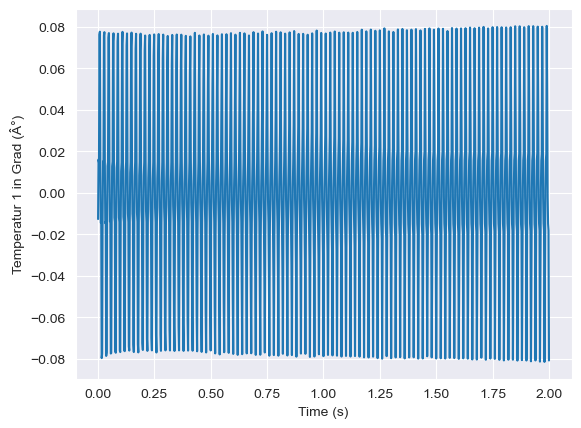

In [20]:
# plotting temperature from sensor 1
sns.set_style("darkgrid")
sns.lineplot(x="Time (s)", y="Temperatur 1 in Grad (Â°)", data = bridge_data_df)

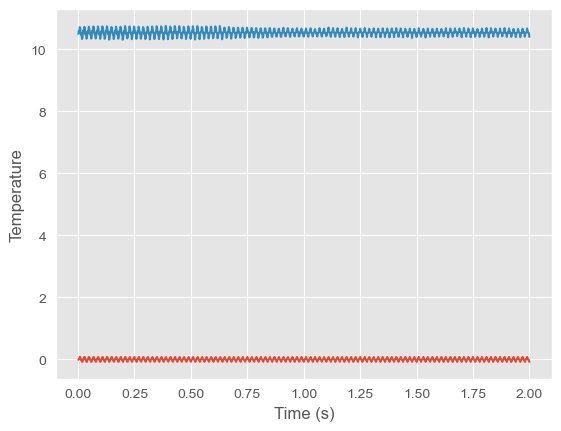

In [21]:
# plotting temperature from sensor 1 and sensor 2 together
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax= sns.lineplot(x="Time (s)", y="Temperatur 1 in Grad (Â°)", data=bridge_data_df)
ax.set(xlabel='Time (s)', ylabel='Temperature')
ax1 = sns.lineplot(x="Time (s)", y="Temperatur 2 in Grad (Â°)", data=bridge_data_df)
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Time (s)', ylabel='Temperatur 3 in Grad (Â°)'>

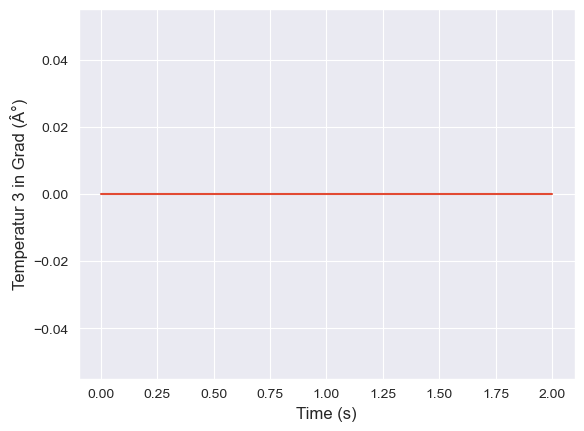

In [22]:
# plotting temperature from sensor 3
sns.set_style("darkgrid")
sns.lineplot(x="Time (s)", y="Temperatur 3 in Grad (Â°)", data = bridge_data_df)

In [23]:
# Minimum and maximum strain recorded by the DMS1 sensor
print('Minimum strain recorded by DMS 1 sensor: ' + str(bridge_data_df['DMS 1 berechnet (-)'].min()))
print('Maximum strain recorded by DMS 1 sensor: ' + str(bridge_data_df['DMS 1 berechnet (-)'].max()))

Minimum strain recorded by DMS 1 sensor: -0.173205435276031
Maximum strain recorded by DMS 1 sensor: 0.150654003024101


<AxesSubplot:xlabel='Time (s)', ylabel='DMS 1 berechnet (-)'>

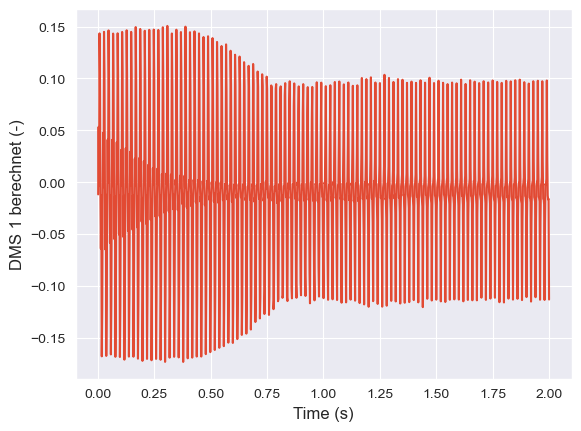

In [24]:
# lets plot the strain values for DMS1 sensor
sns.lineplot(data=bridge_data_df, x="Time (s)", y="DMS 1 berechnet (-)")